# Simulations for the paper

## 1. Original framework
Solve the equation (2):
$$I_{t+1} = I_t(1+a\rho(1-r-m)N) - a\rho(1-r-m)(1+r+m)I_t^2 \text{ (2) }$$
And equation (3) and (4):
$$i_{t+1} = i_t(1+a\rho(1-r-m)\frac{N}{K}) - a\rho(1-r-m)(1+r+m)i_t^2 \text{ (3) }$$  
and $$I_t = Ki_t \text{ (4) }$$

In order to facilitate the simulation, we can see that the equation (2) is a special case of (3) and (4) when $$K=1$$. So, we rewrite the equation we want to simulate as (5) and (6):
$$i(t+1,K) = i(t,K)(1+a\rho(1-r-m)\frac{N}{K}) - a\rho(1-r-m)(1+r+m)i(t,K)^2 \text{ (5) }$$  
and $$I(t,K) = Ki(t,K) \text{ (6) }$$

The active infected persons is governed by the following equations: 
$$A(0,K) = I(0,K)(1-r-m)\text{ (7) and }$$
$$A(t+1,K) = A(t,K)(1-r-m) + (I(t+1,K) - I(t,K))(1-r-m) \text{ (8) }$$ 

### 1.1 Question 1
Compare $$I(t,K) \text{ and } I(t,1)$$
In order to do this, the implementation is direct:

In [1]:
using Plots
include("utils.jl")

generatedata (generic function with 9 methods)

In [2]:
methods(generatedata)

# 9 methods for generic function "generatedata":
[1] generatedata(N::Int64, H::Int64, γ::Float64, ρ::Float64, a::Float64, r₀::Float64, m::Float64, I₀::Float64, K::Int64, tolerance::Float64, itermax::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:74
[2] generatedata(N::Int64, H::Int64, γ::Float64, ρ::Float64, a::Float64, r₀::Float64, m::Float64, I₀::Float64, K::Int64, tolerance::Float64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:74
[3] generatedata(N::Int64, H::Int64, γ::Float64, ρ::Float64, a::Float64, r₀::Float64, m::Float64, I₀::Float64, K::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:74
[4] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64, start::Int64, tolerance::Float64, itermax::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:40
[5] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64, start::Int64, tolerance::Float64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:40
[6] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64, start::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:40
[7] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64, tolerance::Float64, itermax::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:5
[8] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64, tolerance::Float64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:5
[9] generatedata(N::Int64, ρ::Float64, a::Float64, r::Float64, m::Float64, I₀::Float64, K::Int64) in Main at C:\Users\duy-m\station\covidSimulation\julia\utils.jl:5

In [4]:
N = 10000 # population
I₀ = 1.0 # the stock of infected persons at t=0
ρ = 2.2 # the probability to get the virus by matching
a = 0.0001 # the intensity of the infection
r = 0.85 # the recovery rate when taken care of in hospital normally
m = 0.1 # the death rate
tolerance = 1E-7 # convergence tolerance 
itermax = 20000 # max iteration

20000

In [7]:
# n, pdf, cdf, net, act = generatedata(N, ρ, a, r, m, I₀, K)
# n being the number of days at convergence
# cdf being the I(t,K)
# pdf being the I(t+1,K) - I(t,K)
# net being the I(t,K) - rI(t,K) - mI(t,K)
# act being the active infected persons, governed by the dynamics (7) and (8), or A(t,K)

In [8]:
# For K=1
n_1, pdf_1, cdf_1, net_1, act_1 = generatedata(N, ρ, a, r, m, I₀, 1)
# For K=2
n_2, pdf_2, cdf_2, net_2, act_2 = generatedata(N, ρ, a, r, m, I₀, 2)
# For K=3
n_3, pdf_3, cdf_3, net_3, act_3 = generatedata(N, ρ, a, r, m, I₀, 3)
# For K=5
n_5, pdf_5, cdf_5, net_5, act_5 = generatedata(N, ρ, a, r, m, I₀, 5)
# For K=8
n_8, pdf_8, cdf_8, net_8, act_8 = generatedata(N, ρ, a, r, m, I₀, 8)

(2099, [0.0, 0.013747318749999904, 0.013936270156089448, 0.014127817589353775, 0.014321996688300587, 0.014518843579893081, 0.014718394886223951, 0.014920687731277082, 0.015125759747783851, 0.015333649084170675  …  1.1335578165017068e-7, 1.1179781722603366e-7, 1.1026077118003741e-7, 1.0874464351218194e-7, 1.0724943422246724e-7, 1.0577514331089333e-7, 1.0431995178805664e-7, 1.0288567864336073e-7, 1.0147141438210383e-7, 1.0007624950958416e-7], [1.0, 1.01374731875, 1.0276835889060894, 1.0418114064954431, 1.0561334031837437, 1.0706522467636368, 1.0853706416498607, 1.1002913293811378, 1.1154170891289217, 1.1307507382130924  …  5128.205120074339, 5128.205120186137, 5128.205120296398, 5128.205120405142, 5128.205120512392, 5128.205120618167, 5128.205120722487, 5128.205120825372, 5128.205120926844, 5128.20512102692], [0.05000000000000002, 0.05068736593750001, 0.05138417944530448, 0.05209057032477218, 0.052806670159187205, 0.05353261233818186, 0.054268532082493055, 0.05501456646905691, 0.05577085

In [9]:
n_1, n_2, n_3, n_5, n_8

(276, 546, 810, 1331, 2099)

### 1. We want to inspect the effect of isolation on pandemic time:

In [10]:
duration = zeros(80)
for i in 1:80
    n,_,_,_,_ = generatedata(N, ρ, a, r, m, I₀, i)
    duration[i] = n
end

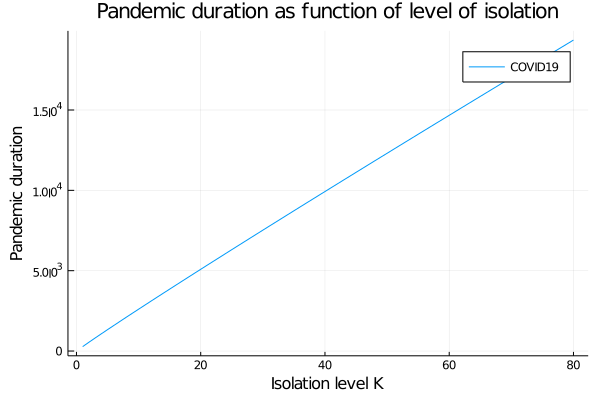

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [11]:
plot(duration, title="Pandemic duration as function of level of isolation", label="COVID19", 
    xlabel="Isolation level K", ylabel="Pandemic duration")

### 1.1 Question 1: 

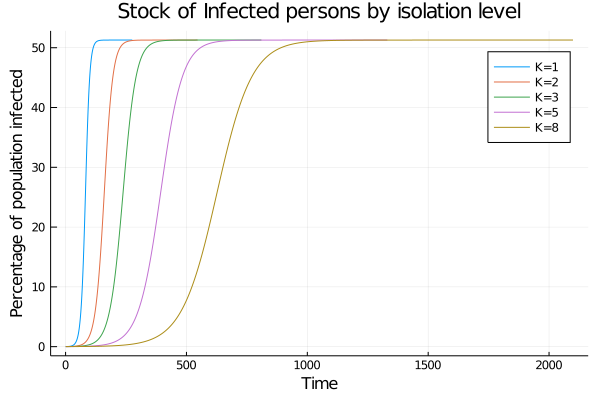

In [12]:
plot(cdf_1/N*100, title="Stock of Infected persons by isolation level", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(cdf_2/N*100, label="K=2")
plot!(cdf_3/N*100, label="K=3")
plot!(cdf_5/N*100, label="K=5")
plot!(cdf_8/N*100, label="K=8")

We can see that seemingly $I(t,K)$ is decreasing in $K$. And the stock converges to $N/(1+r+m)$. In our simulation, it equals $100/1.95=51.28\%$
### 1.2 Question 2
Study the $\delta I(t,K)$ in terms of $K$

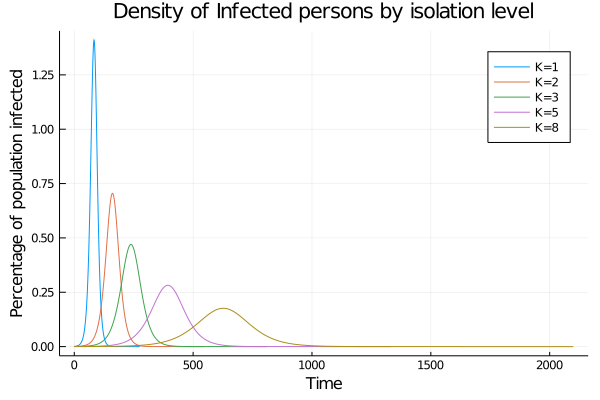

In [13]:
plot(pdf_1/N*100, title="Density of Infected persons by isolation level", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(pdf_2/N*100, label="K=2")
plot!(pdf_3/N*100, label="K=3")
plot!(pdf_5/N*100, label="K=5")
plot!(pdf_8/N*100, label="K=8")

Here we can see graphically that the density curve of infected persons is flattened as we increase the isolation level $K$. 

### 1.3 Question 3
Study the net infected persons $I(t,K) - rI(t,K) -mI(t,K)$

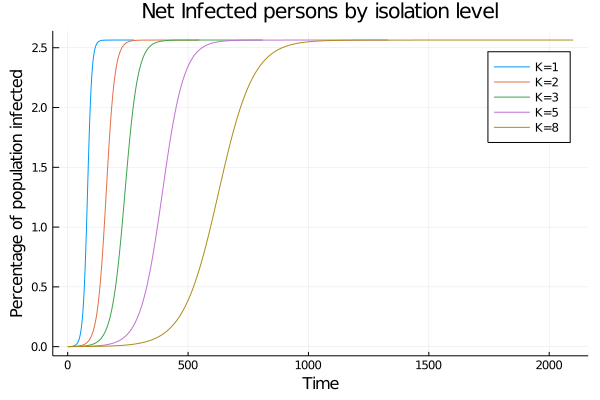

In [14]:
plot(net_1/N*100, title="Net Infected persons by isolation level", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(net_2/N*100, label="K=2")
plot!(net_3/N*100, label="K=3")
plot!(net_5/N*100, label="K=5")
plot!(net_8/N*100, label="K=8")

### 1.3.1 Question 4
Study the active infected persons $A(t,K)$ governed by equations (7) and (8). 

In [15]:
plot(act_1/N*100, title="Active Infected persons by isolation level", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(act_2/N*100, label="K=2")
plot!(act_3/N*100, label="K=3")
plot!(act_5/N*100, label="K=5")
plot!(act_8/N*100, label="K=8")

### 1.4 Question 4
Suppose that $r$ is a decreasing function of $I_t$. I have tried several ones and it seems that it's pretty much the same result. Here I take $r$ as follows:
$$r=r_0 \text{ if }I_t < H \text{ and } r_0*\exp(\gamma*(H-I_t)/N) \text{ otherwise }$$, 
where $H$ be the hospital capacity and $\gamma$ the hospital density propensity on recovery rate. 

In [16]:
# The implemented function. Thanks to the polymorphism of the Julia language, the implemented function is still the same 
# name `generatedata`. However, this time we add H and \gamma to the parameters
# n, pdf, cdf, net, act = generatedata(N, H, γ, ρ, a, r, m, I₀, K)

In [17]:
N = 10000 # population
H = 3 # number of capacity of reanimation
γ = 3.0 # hospital density propensity on recovery rate
I₀ = 1.0 # the stock of infected persons at t=0
ρ = 2.2 # the probability to get the virus by matching
a = 0.0001 # the intensity of the infection
r = 0.85 # the recovery rate when taken care of in hospital normally
m = 0.1 # the death rate

0.1

In [18]:
# For K=1
n_1, pdf_1, cdf_1, net_1, act_1 = generatedata(N, H, γ, ρ, a, r, m, I₀, 1)
# For K=2
n_2, pdf_2, cdf_2, net_2, act_2 = generatedata(N, H, γ, ρ, a, r, m, I₀, 2)
# For K=3
n_3, pdf_3, cdf_3, net_3, act_3 = generatedata(N, H, γ, ρ, a, r, m, I₀, 3)
# For K=5
n_5, pdf_5, cdf_5, net_5, act_5 = generatedata(N, H, γ, ρ, a, r, m, I₀, 5)
# For K=8
n_8, pdf_8, cdf_8, net_8, act_8 = generatedata(N, H, γ, ρ, a, r, m, I₀, 8)

(955, [0.0, 0.013747318749999904, 0.013936270156089448, 0.014127817589353775, 0.014321996688300587, 0.014518843579893081, 0.014718394886223951, 0.014920687731277082, 0.015125759747783851, 0.015333649084170675  …  1.7052752809831873e-7, 1.6147168935276568e-7, 1.5289879229385406e-7, 1.447806425858289e-7, 1.3709268387174234e-7, 1.298139977734536e-7, 1.2292184692341834e-7, 1.1639531294349581e-7, 1.1021529644494876e-7, 1.0436269803903997e-7], [1.0, 1.01374731875, 1.0276835889060894, 1.0418114064954431, 1.0561334031837437, 1.0706522467636368, 1.0853706416498607, 1.1002913293811378, 1.1154170891289217, 1.1307507382130924  …  5586.715059469176, 5586.715059630647, 5586.715059783546, 5586.715059928327, 5586.7150600654195, 5586.7150601952335, 5586.715060318155, 5586.715060434551, 5586.715060544766, 5586.715060649129], [0.05000000000000002, 0.05068736593750001, 0.05138417944530448, 0.05209057032477218, 0.052806670159187205, 0.05353261233818186, 0.054268532082493055, 0.05501456646905691, 0.05577085

#### The stock of infected persons by isolation level

In [19]:
plot(cdf_1/N*100, title="Stock of Infected persons by isolation level, r decreasing", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(cdf_2/N*100, label="K=2")
plot!(cdf_3/N*100, label="K=3")
plot!(cdf_5/N*100, label="K=5")
plot!(cdf_8/N*100, label="K=8")

This time, the stock converges differently and the converged level of stock of infected persons seems to decrease in terms of isolation level $K$. And the stock of infected persons is decreasing in K. It deduces that the isolation does decrease the aggregate number of deaths. 

#### The stock of dead persons by isolation level 

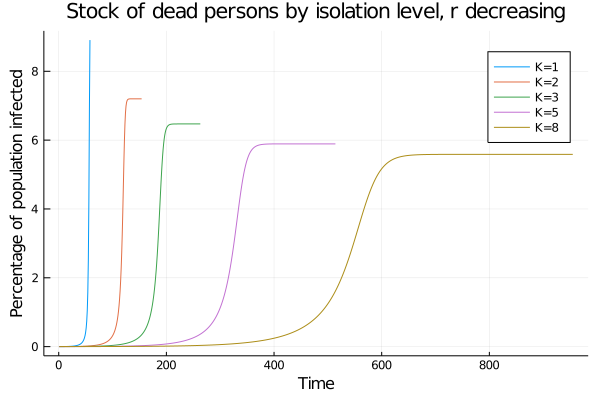

In [20]:
plot(cdf_1/N*100*m, title="Stock of dead persons by isolation level, r decreasing", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(cdf_2/N*100*m, label="K=2")
plot!(cdf_3/N*100*m, label="K=3")
plot!(cdf_5/N*100*m, label="K=5")
plot!(cdf_8/N*100*m, label="K=8")

#### The density of infected persons by isolation level

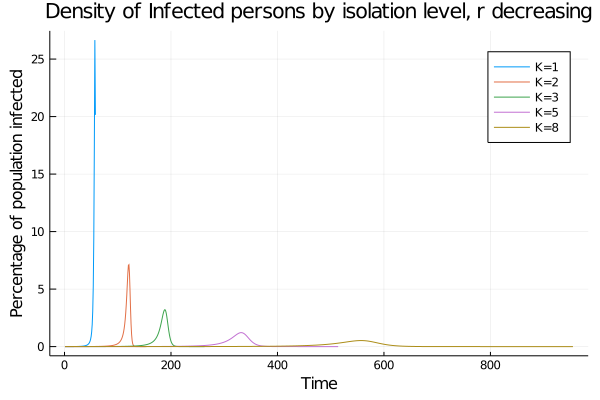

In [21]:
plot(pdf_1/N*100, title="Density of Infected persons by isolation level, r decreasing", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(pdf_2/N*100, label="K=2")
plot!(pdf_3/N*100, label="K=3")
plot!(pdf_5/N*100, label="K=5")
plot!(pdf_8/N*100, label="K=8")

We can see that this time the curve is flattened much faster compared when $r$ is constant. 

#### The net infected persons by isolation level

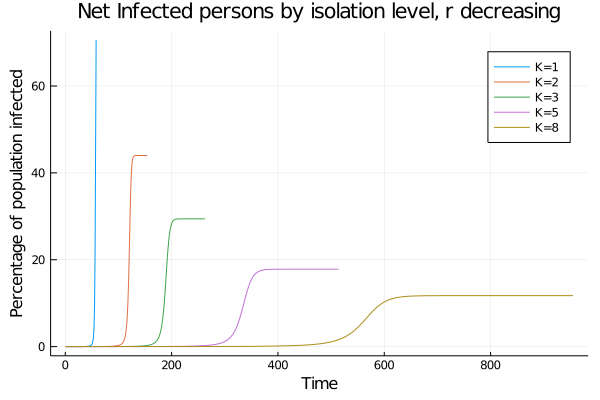

In [22]:
plot(net_1/N*100, title="Net Infected persons by isolation level, r decreasing", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(net_2/N*100, label="K=2")
plot!(net_3/N*100, label="K=3")
plot!(net_5/N*100, label="K=5")
plot!(net_8/N*100, label="K=8")

#### The active infected persons by isolation level

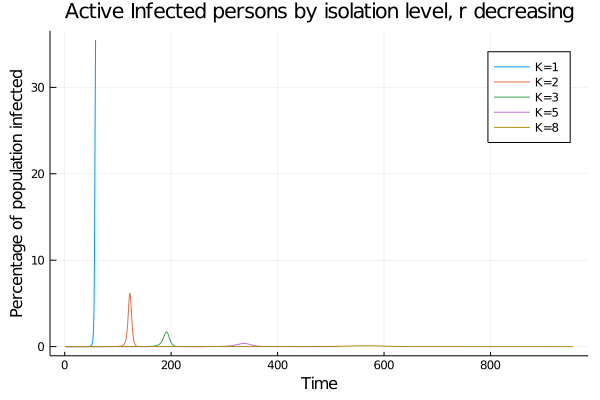

In [23]:
plot(act_1/N*100, title="Active Infected persons by isolation level, r decreasing", xlabel="Time", 
    ylabel="Percentage of population infected", label="K=1")
plot!(act_2/N*100, label="K=2")
plot!(act_3/N*100, label="K=3")
plot!(act_5/N*100, label="K=5")
plot!(act_8/N*100, label="K=8")